## Iris Flowers Classification ML Project : 

###### Begineer Task -1

The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Datasetlink : http://archive.ics.uci.edu/ml/datasets/Iris

### Name : Bhakti Arvind Mandlik

## Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.cluster import KMeans
from sklearn import metrics

## Reading the dataset

In [2]:
header=["sepal length","sepal width","petal length","petal width","class"]
data=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header= None,names = header)
print(data)

     sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


## Exploring Dataset

In [3]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [4]:
data.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [5]:
data.size

750

In [6]:
data.shape

(150, 5)

In [7]:
data.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [8]:
data.tail(10)

,sepal length,sepal width,petal length,petal width,class
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [9]:
data.info

<bound method DataFrame.info of      sepal length  sepal width  petal length  petal width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [10]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking the Null values

In [11]:
data.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

## Visualization of dataset

C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


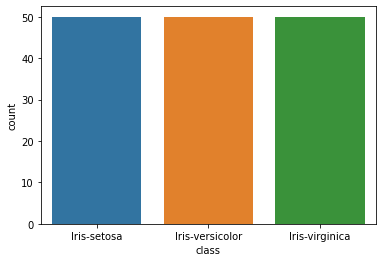

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(data['class'],label="Size")
plt.show()

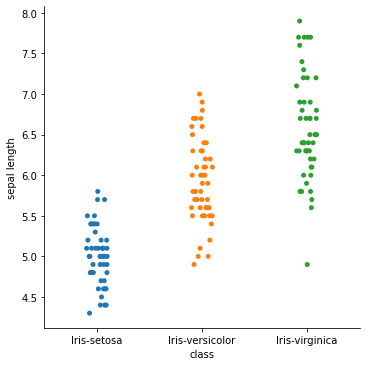

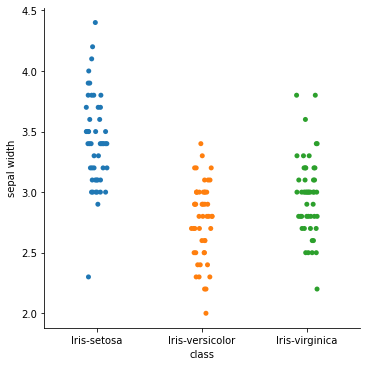

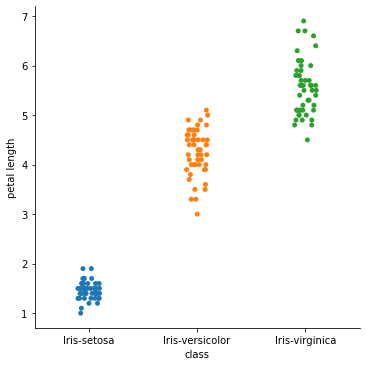

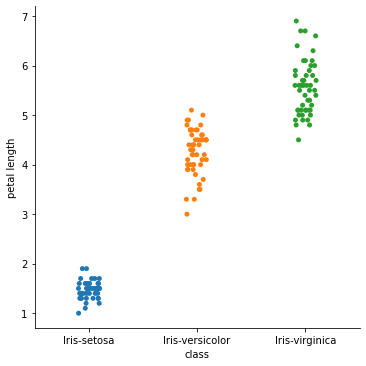

In [13]:
sns.catplot(x='class',y='sepal length',data=data)
sns.catplot(x='class',y='sepal width',data=data)
sns.catplot(x='class',y='petal length',data=data)
sns.catplot(x='class',y='petal length',data=data)

## Knowing the Number of optimum Cluster

In [14]:
from sklearn.cluster import KMeans
ic=[]
for i in range(1,10):
    kmeans =KMeans(n_jobs=-1,n_clusters = i,init = 'k-means++')
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    ic.append(kmeans.inertia_)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings

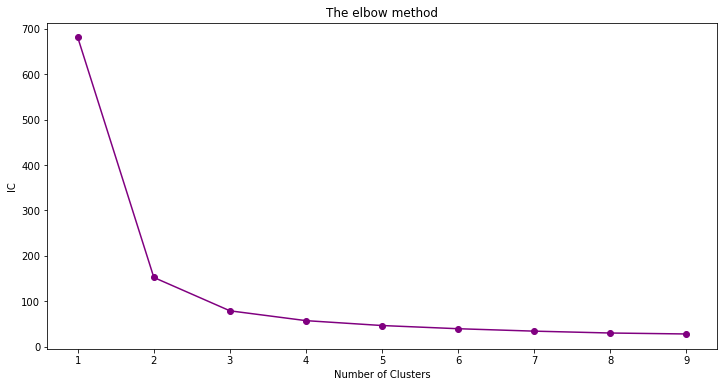

In [15]:
df=pd.DataFrame({'Cluster':range(1,10),'ic':ic})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'],df['ic'],marker='o',color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('IC')
plt.title('The elbow method')
plt.show()

## Visualizing Centroids on the Clusters of columns sepalLength and sepalWidth

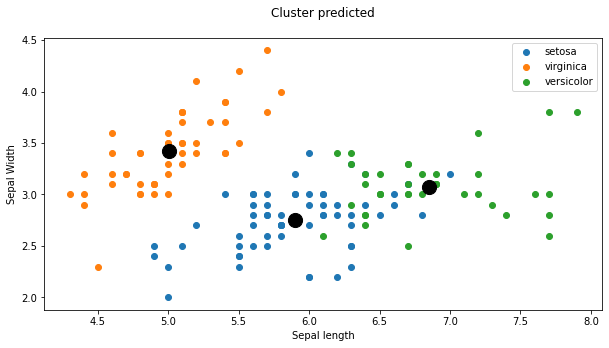

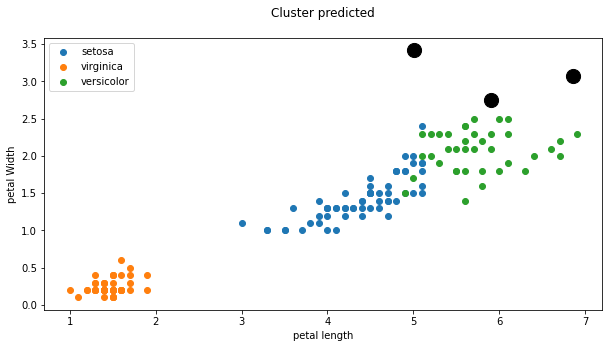

In [16]:
kmeans=KMeans(n_clusters=3, init='k-means++')
y_kmeans=kmeans.fit_predict(data.iloc[:,[0,1,2,3]].values)

x= data.iloc[:,[0,1,2,3]].values
plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],label='setosa')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],label='virginica')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],label='versicolor')
plt.legend()
plt.title('Cluster predicted\n')
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroids') 
plt.show()

plt.figure(figsize=(10,5))
plt.scatter(x[y_kmeans==0,2],x[y_kmeans==0,3],label='setosa')
plt.scatter(x[y_kmeans==1,2],x[y_kmeans==1,3],label='virginica')
plt.scatter(x[y_kmeans==2,2],x[y_kmeans==2,3],label='versicolor')
plt.legend()
plt.title('Cluster predicted\n')
plt.xlabel('petal length')
plt.ylabel('petal Width')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='Centroids') 
plt.show()

## Correlation Matrix

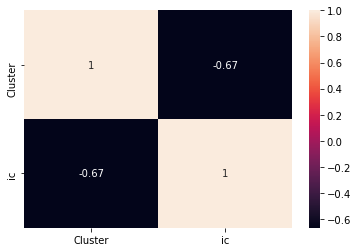

In [17]:
sns.heatmap(df.corr(),annot= True)
plt.show()


## Gaussians Naive Bayes Accuracy check

In [18]:
x_data=data.reindex(columns=["sepal length","sepal width","petal length","petal width"])
x_train,x_test,y_train,y_test=train_test_split(x_data, data["class"],test_size=0.3,random_state=42)

In [19]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of Gaussians naive bayes classifiers on training set: {:.2f}'.format(gnb.score(x_train,y_train)))
print('Accuracy of Gaussians naive bayes classifiers on test set: {:.2f}'.format(gnb.score(x_test,y_test)))

Accuracy of Gaussians naive bayes classifiers on training set: 0.94
Accuracy of Gaussians naive bayes classifiers on test set: 0.98
